# Day 15 In-Class Assignment: Write a Scientific Report
### <p style="text-align: right;"> &#9989; Cesarine Graham</p>


#### <p style="text-align: right;"> &#9989; Shaan Karim, Kinza Hasan, Allison Perez-Bermudez.</p>


## Goals of this assignment

The goals of this assignment are:

* Apply the pre-class knowledge to write a scientific report
* Submit one report from each group
* Use the example code to generate for figures and results

## Assignment instructions

Upload the assignment to Gradescope before noon on the day of the class.

-----------
## Part 1: One-Particle Schrödinger Equation

Your project is about solving the one-particle Schrödinger equation for a potential specified in the function
`potential()`.
Below is an example code for the harmonic oscillator in three dimensions.

You and your groupmates will modify this code (changing variables, changing the potential, etc.) to generate results with plots and tables for the report.

10.999825391361576
14.999168186990154
18.997888878700717


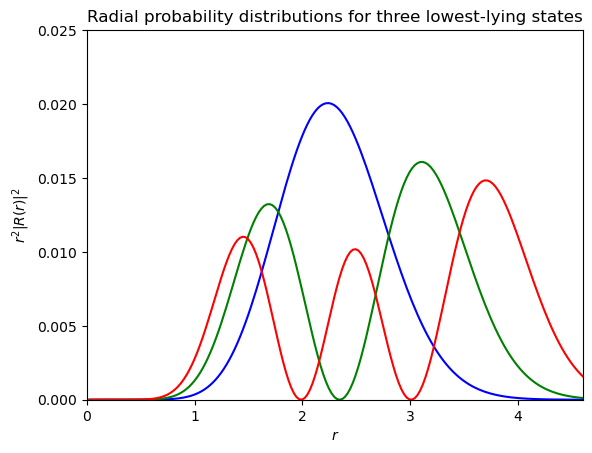

In [15]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

# Initialize the parameters
def initialize():
    rmin = 0.0
    rmax = 10.0 #radius of the orbit
    l_orbital = 4 #orbital angular momentum 
    dim = 400 #number of integration points
    return rmin, rmax, l_orbital, dim

# Set up the harmonic-oscillator potential
def potential(r):
    return r*r

# Set the boundary, orbital momentum and number of integration points
rmin, rmax, l_orbital, dim = initialize()

# Initialize derived constants
step          = rmax/(dim+1)
diag_const     = 2.0 / (step*step)
nondiag_const  = -1.0 / (step*step)
orbital_factor = l_orbital * (l_orbital + 1.0)

# Calculate an array of potential values
v = np.zeros(dim)
r = np.linspace(rmin, rmax, dim)
for i in range(dim):
    r[i] = rmin + (i+1) * step;
    v[i] = potential(r[i]) + orbital_factor/(r[i]*r[i]);

# Fill out the tridiagonal Hamiltonian matrix
hamiltonian = np.zeros((dim,dim))
hamiltonian[0,0] = diag_const + v[0];
hamiltonian[0,1] = nondiag_const;
for i in range(1,dim-1):
    hamiltonian[i,i-1] = nondiag_const;
    hamiltonian[i,i]   = diag_const + v[i];
    hamiltonian[i,i+1] = nondiag_const;
hamiltonian[dim-1,dim-2] = nondiag_const;
hamiltonian[dim-1,dim-1] = diag_const + v[dim-1];

# Obtain the eigenvalues and eigenvectors (not necessarily sorted)
evals, evecs = np.linalg.eig(hamiltonian)

# Sort the eigenvalues and eigenvectors
permute = evals.argsort()
evals = evals[permute]
evecs = evecs[:,permute]

# Plot the results for the three lowest-lying eigenstates
for i in range(3):
    print(evals[i])

plt.plot(r, evecs[:,0]**2 ,'b-',r, evecs[:,1]**2 ,'g-',r, evecs[:,2]**2 ,'r-')
plt.axis([0,4.6,0.0, 0.025])
plt.xlabel(r'$r$')
plt.ylabel(r'$r^2|R(r)|^2$')
plt.title(r'Radial probability distributions for three lowest-lying states')
plt.savefig('eigenvector.pdf')
plt.show()

-----------
## Part 2: Write Your Report in Overleaf

Each group will be working on one Overleaf project together.
Remember to add your information to the top of the document.

You will be following the steps of a typical physicist writing a scientific paper.

1. Decide which journal would be most likely to publish the paper and download their template.
Let's assume that your paper will go with in an American Physical Society (APS) journal, since one of the most used publishers in the US (and worldwide).
Download their template `revtex-tds-2020-10-22.zip` from [this website](https://journals.aps.org/revtex).

2. Upload it to your [Overleaf](https://www.overleaf.com/) project
You will be using the group link that instructor created for your group below.
Each group should **only** use their own link. (Do not use the wrong link!)

| Group  | Links  |
| :---   |    :----     |      
| 1      |  https://www.overleaf.com/6177477651kprvbmjsdzwf#ec623c             |
| 2      |  https://www.overleaf.com/2323729266smhhmwffcpdm#370b69             |
| 3      |  https://www.overleaf.com/5981924745kgvgmvybtkbr#4b999a              |
| 4      |  https://www.overleaf.com/8972672453kfvcmxqfszng#7635c2             |   
| 5      |  https://www.overleaf.com/1469373827gtbvtbbykjmy#98b7f5            |   
| 6      |  https://www.overleaf.com/1561561326mvytjmbykfqc#2ca2e3             |   
|

3. First, put in your name and addresses.
Example address: "Department of Physics and Astronomy, Michigan State University, East Lansing, MI 48824". Change/update the department name as needed.

4. In a collaborative project, it's important to discuss the plan, create an outline and assign a person in charge (and sometimes a secondary) to get the writing going for each section.
Put down your outline in a new Markdown cell below.

5. Write a least one paragraph (at least 3+ sentences) per section one figure, one table, one equation, and learn how to refers to them in the main text to complete the in-class assignment.
If more time is needed, please talk to the TA/instructor.

6. The first draft of the paragraph can be written by one or two, but everyone on the author list should read through the whole report, making sure that the writing and the notations used in the paper is coherent.
A real report/paper should also include transitions and a clear train of thought; think about it as telling a story but in a formal way.

Happy writing!